## Decoding Tinder Data

We'll try to make sense of my Tinder data.

#### For indepth analysis and explanation please visit: https://medium.com/@mukundmadhav/tinder-data-54ba494e0a59

You can download your data here: <a href="https://account.gotinder.com/data">https://account.gotinder.com/data</a>

If you want to generate similar report for your data, just add your
data.json(that you go from the aforementioned link) file in the same directory 
as this Python Notebook.


In [1]:
#Importing packages
import json # to read json file
import pandas as pd # to use data frame
import matplotlib.pyplot as plt # for plotting charts
from datetime import datetime # to well...use datetime...

In [2]:
f = open('./data.json', 'r', encoding="utf8")
data = json.load(f) #reading the json file from 'f'

#We are going to be using the usage array, so storing it in another avriable for faster retrival
usageData = data["Usage"]
f.close()

After we have imported the data

Let's analyze the swipes

In [3]:
noOfLikes = sum(usageData["swipes_likes"].values())
noOfPasses = sum(usageData["swipes_passes"].values())
totalSwipes = noOfLikes + noOfPasses
print('Total swipes: ', totalSwipes)
print('Number of likes: ', noOfLikes)
print('Number of passes: ', noOfPasses)

Total swipes:  10106
Number of likes:  1259
Number of passes:  8847


To put it into graphical terms...

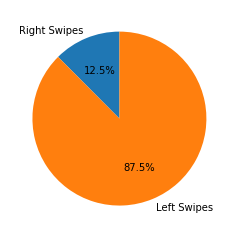

In [4]:
slices_hours = [noOfLikes, noOfPasses]
activities = ['Right Swipes', 'Left Swipes']
plt.pie(slices_hours, labels=activities,startangle=90, autopct='%.1f%%')
plt.show()

<a href='http://colorhexpicker.com/'>Color hex picker</a> is the perfect site, you'd want to tinker with the colors and find a color that suits your pie chart.

Now let's grab the matches

In [5]:
noOfMatches = sum(usageData["matches"].values())
print('Number of matches: ', noOfMatches)

Number of matches:  255


To put it into graphical terms...

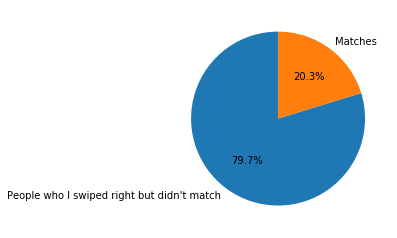

In [6]:
slices_hours = [noOfLikes-noOfMatches, noOfMatches]
activities = ['People who I swiped right but didn\'t match', 'Matches']
plt.pie(slices_hours, labels=activities,startangle=90, autopct='%.1f%%')
plt.show()

Quantifying my desparation...

In [7]:
mostLikesInDay = max(usageData["swipes_likes"].values())
mostPassesInDay = max(usageData["swipes_passes"].values())

print('Most number of swipes in a day: ', mostLikesInDay + mostPassesInDay)
print('Most number of likes in a day: ', mostLikesInDay)
print('Most number of passes in a day: ', mostPassesInDay)
print('---------------------------------------------------------')

mostMessagesRecievedInDay = max(usageData["messages_received"].values())
mostMessagesSentInDay = max(usageData["messages_sent"].values())
mostAppOpenInDay = max(usageData["app_opens"].values())

print('Most messages sent in a day: ', mostMessagesSentInDay)
print('Most messages received in a day: ', mostMessagesRecievedInDay)
print('Most app opens in a day: ', mostAppOpenInDay)


Most number of swipes in a day:  1059
Most number of likes in a day:  74
Most number of passes in a day:  985
---------------------------------------------------------
Most messages sent in a day:  58
Most messages received in a day:  61
Most app opens in a day:  38


#### Matches by day of the week

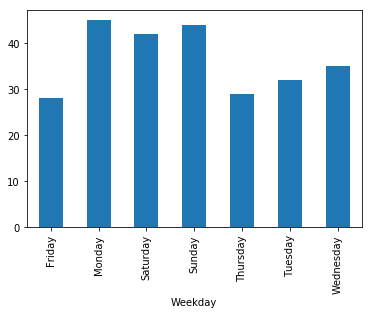

In [38]:
#Making an empty data frame with Date and matches as column names
matchesDf = pd.DataFrame(columns=['Date', 'Matches'])

#Appending all the matches in the data frame
for key, value in usageData['matches'].items():
    matchesDf = matchesDf.append(pd.DataFrame([[key,value]], columns=matchesDf.columns))

#Extracting the day names into another column
matchesDf['Weekday'] = pd.to_datetime(matchesDf['Date']).dt.day_name()

#Summing values by the day of the week and then plotting a bar graph
matchesDf.groupby('Weekday')['Matches'].sum().plot.bar()

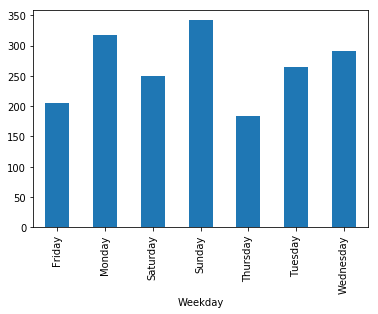

In [44]:
#Making an empty data frame with Date and matches as column names
appOpenDf = pd.DataFrame(columns=['Date', 'app_opens'])

#Appending all the matches in the data frame
for key, value in usageData['app_opens'].items():
    appOpenDf = appOpenDf.append(pd.DataFrame([[key,value]], columns=appOpenDf.columns))

#Extracting the day names into another column    
appOpenDf['Weekday'] = pd.to_datetime(appOpenDf['Date']).dt.day_name()

#Summing values by the day of the week and then plotting a bar graph
appOpenDf.groupby('Weekday')['app_opens'].sum().plot.bar()

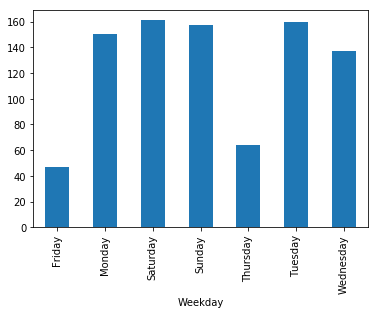

In [45]:
#Making an empty data frame with Date and matches as column names
df = pd.DataFrame(columns=['Date', 'messages_received'])

#Appending all the matches in the data frame
for key, value in usageData['messages_received'].items():
    df = df.append(pd.DataFrame([[key,value]], columns=df.columns))
    
#Extracting the day names into another column
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()

#Summing values by the day of the week and then plotting a bar graph
df.groupby('Weekday')['messages_received'].sum().plot.bar()

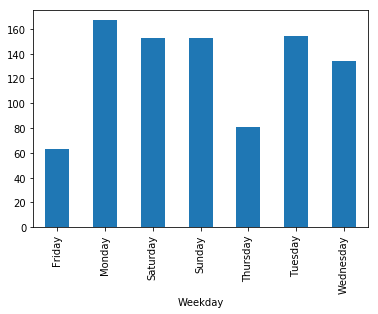

In [46]:
#Making an empty data frame with Date and matches as column names
df = pd.DataFrame(columns=['Date', 'messages_sent'])

#Appending all the matches in the data frame
for key, value in usageData['messages_sent'].items():
    df = df.append(pd.DataFrame([[key,value]], columns=df.columns))
    
#Extracting the day names into another column
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()

#Summing values by the day of the week and then plotting a bar graph
df.groupby('Weekday')['messages_sent'].sum().plot.bar()

That's all. Happy Tindering :)